# Part I - Loan Data From Prosper
## by Roseland Ambuku

## Introduction
The 113,937 loans in this data set have an average of 81 variables, such as loan amount, borrower rate (or interest rate),current loan status, borrower income, and a lot more.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df_loandata = pd.read_csv('prosperLoanData.csv')

In [3]:
df_loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df_loandata.shape

(113937, 81)

In [5]:
print(df_loandata.dtypes)

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [6]:
df_loandata.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### Data Cleaning
##### The following are some of the steps that shall be carried out:
1. Choosing the subset of features(variables) that are important in the study. 
2. Dropping all duplicated rows on the basis of Listing Number.
3. Converting the following datatypes: ListingCreationDate to datetime, TotalInquires and TotalTrades to int.
4. Fill in the missing values of occupation and DebtToIncomeRatio.
5. Removing rows that do not have ProsperRating.
6. Changing Listing category (numeric) to string

In [7]:
#Creating a subset of the entire dataframe to select the features we are interested in
clmns = ['ListingNumber','ListingCreationDate','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)', 
        'Occupation','Term','EmploymentStatus','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors']
df_proloans = df_loandata[clmns]

In [8]:
#Information on the subset of the dataframe
df_proloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   LoanOriginalAmount         113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   BorrowerState              108422 non-null  object 
 6   BorrowerAPR                113912 non-null  float64
 7   BorrowerRate               113937 non-null  float64
 8   StatedMonthlyIncome        113937 non-null  float64
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  Occupation                 110349 non-null  object 
 11  Term                       113937 non-null  int64  
 12  EmploymentStatus           111682 non-null  object 
 13  TotalInquiries             11

In [9]:
#Looking at rows to see errors present
df_proloans.sample(20)

,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
33061,1059674,2013-12-08 06:28:38.607000000,4000,Current,1,WI,0.18990,0.1535,2500.000000,B,Other,36,Employed,6.0,0.40,139.35,35.0,40
107381,666085,2012-11-06 09:26:08.730000000,25000,Current,1,GA,0.22693,0.2024,11250.000000,B,Other,60,Employed,3.0,0.34,665.69,65.0,49
97876,847193,2013-07-22 14:34:14.113000000,10000,Completed,1,MI,0.22283,0.1984,5833.333333,C,Sales - Commission,60,Employed,11.0,0.45,264.05,65.0,1
41909,130401,2007-04-30 06:31:26.430000000,3000,Completed,0,AR,0.08584,0.0790,5125.000000,NaN,Analyst,36,Full-time,0.0,0.05,93.87,19.0,96
74187,368750,2008-07-16 21:04:31.470000000,4000,Chargedoff,5,PA,0.24244,0.2198,2666.666667,NaN,Construction,36,Full-time,2.0,NaN,152.72,14.0,62
30736,80640,2007-01-02 23:22:36.580000000,10000,Defaulted,0,NaN,0.17722,0.1700,833.333333,NaN,Sales - Commission,36,Not available,4.0,1.95,356.53,NaN,86
28179,473624,2010-08-30 10:32:19.747000000,4000,Completed,1,GA,0.38723,0.3500,5166.666667,HR,Military Enlisted,36,Employed,6.0,0.44,180.94,30.0,31
66126,203521,2007-09-18 18:04:11.643000000,3000,Defaulted,0,CA,0.30564,0.2900,4333.333333,NaN,Military Enlisted,36,Full-time,21.0,0.13,125.72,15.0,38
101128,295996,2008-03-20 06:13:07.423000000,15000,Completed,1,MD,0.20572,0.1910,2688.416667,NaN,Administrative Assistant,36,Full-time,6.0,0.31,550.60,24.0,391
64608,589585,2012-05-16 06:43:47.887000000,4000,Current,13,MO,0.35797,0.3177,7333.333333,HR,Other,36,Employed,5.0,0.24,173.71,34.0,19


In [10]:
# Dropping any duplicate values in the dataset
df_proloans = df_proloans.drop_duplicates()

In [11]:
#Selecting the rows in ProsperRating (Alpha) that are not null and where missing values can not be filled
df_proloans = df_proloans[df_proloans['ProsperRating (Alpha)'].notnull()]

In [12]:
# Flling in the missing values of DebttoIncome using the mean value of the column
df_proloans.DebtToIncomeRatio = df_proloans.DebtToIncomeRatio.fillna(df_proloans.DebtToIncomeRatio.mean())

In [13]:
#Filling in the missing values in Occupation with unknown
df_proloans.Occupation = df_proloans.Occupation.fillna('Unknown')

In [14]:
#Converting the datatypes of the necessary columns
df_proloans.TotalInquiries = df_proloans.TotalInquiries.astype('Int64')
df_proloans.TotalTrades = df_proloans.TotalTrades.astype('Int64')

In [15]:
# Splitting ListingCreationDate column into year,month,day,time
df_proloans['Year']=df_proloans['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
df_proloans['Month'] = df_proloans['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)

In [17]:
# Changing the numerical values of months with the actual names
df_proloans.Month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace=True)
df_proloans.Month.unique()

array(['Feb', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

In [18]:
df_proloans['ListingCreationDate'] = df_proloans['ListingCreationDate'].apply(lambda x: x.split("-")[2]).astype(str)

In [19]:
df_proloans['Day'] = df_proloans['ListingCreationDate'].apply(lambda x: x.split(" ")[0]).astype(str)
df_proloans['Time'] = df_proloans['ListingCreationDate'].apply(lambda x: x.split(" ")[1]).astype(str)

In [20]:
#Dropping ListingCreationDate column in the original dataset
df_proloans.drop(columns=['ListingCreationDate'],inplace=True)

### Exploratory Data Analysis

In [21]:
df_proloans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              83982 non-null  int64  
 1   LoanOriginalAmount         83982 non-null  int64  
 2   LoanStatus                 83982 non-null  object 
 3   ListingCategory (numeric)  83982 non-null  int64  
 4   BorrowerState              83982 non-null  object 
 5   BorrowerAPR                83982 non-null  float64
 6   BorrowerRate               83982 non-null  float64
 7   StatedMonthlyIncome        83982 non-null  float64
 8   ProsperRating (Alpha)      83982 non-null  object 
 9   Occupation                 83982 non-null  object 
 10  Term                       83982 non-null  int64  
 11  EmploymentStatus           83982 non-null  object 
 12  TotalInquiries             83982 non-null  Int64  
 13  DebtToIncomeRatio          83982 non-null  fl

In [30]:
# Descriptive Statistics of the numerical variables
df_proloans.describe()

,ListingNumber,LoanOriginalAmount,ListingCategory (numeric),BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
count,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,83982.000000,83982.000000
mean,7.712395e+05,9061.224381,3.321771,0.226945,0.19630,5.930614e+03,42.462813,4.285514,0.258692,291.40139,23.925115,68.677788
std,2.359100e+05,6279.649648,4.368851,0.080047,0.07475,8.268432e+03,11.639032,3.828780,0.305687,186.47539,11.610432,95.318077
min,4.162750e+05,1000.000000,0.000000,0.045830,0.04000,0.000000e+00,12.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,5.570608e+05,4000.000000,1.000000,0.163610,0.13590,3.426938e+03,36.000000,2.000000,0.160000,157.11250,15.000000,1.000000
50%,7.341785e+05,7500.000000,1.000000,0.219450,0.18750,5.000000e+03,36.000000,3.000000,0.240000,251.28000,23.000000,32.000000
75%,9.756778e+05,13500.000000,3.000000,0.292540,0.25740,7.083333e+03,60.000000,6.000000,0.310000,387.62000,31.000000,98.000000
max,1.255725e+06,35000.000000,20.000000,0.423950,0.36000,1.750003e+06,60.000000,78.000000,10.010000,2251.51000,122.000000,1189.000000


### What is the structure of your dataset?

There are 21 features and 83,982 loans. Some of the features included are StatedMonthlyIncome, Investors, BorrowerAPR, LoanStatus among others.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are 'DebtToIncome Ratio','Employment Status', they are used to figure out the Borrowers' Annual Percentage Rate of loan applications by clients of Prosper.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

"Monthly Income","Loan Term","Prosper Rating","Occupation" features in the dataset will assist in supporting the investigation into the features of interest.

## Univariate Exploration


In [32]:
#ordering the months into categorical types
order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
rate_order = pd.api.types.CategoricalDtype(ordered=True, categories=order)
df_proloans['Month'] = df_proloans['Month'].astype(rate_order)
df_proloans.groupby('Month')['ListingNumber'].count()

# rate_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
# ordered_var = pd.api.types.CategoricalDtype(ordered = True,
#                                     categories = rate_order)
# df_loandata['Month'] = df_loandata['Month'].astype(ordered_var)
# df_loandata.groupby('Month')['ListingNumber'].count()

Month
Jan     9036
Feb     7887
Mar     5376
Apr     4906
May     5469
Jun     5805
Jul     6630
Aug     6401
Sept    7480
Oct     8586
Nov     8122
Dec     8284
Name: ListingNumber, dtype: int64

<AxesSubplot:xlabel='Day', ylabel='count'>

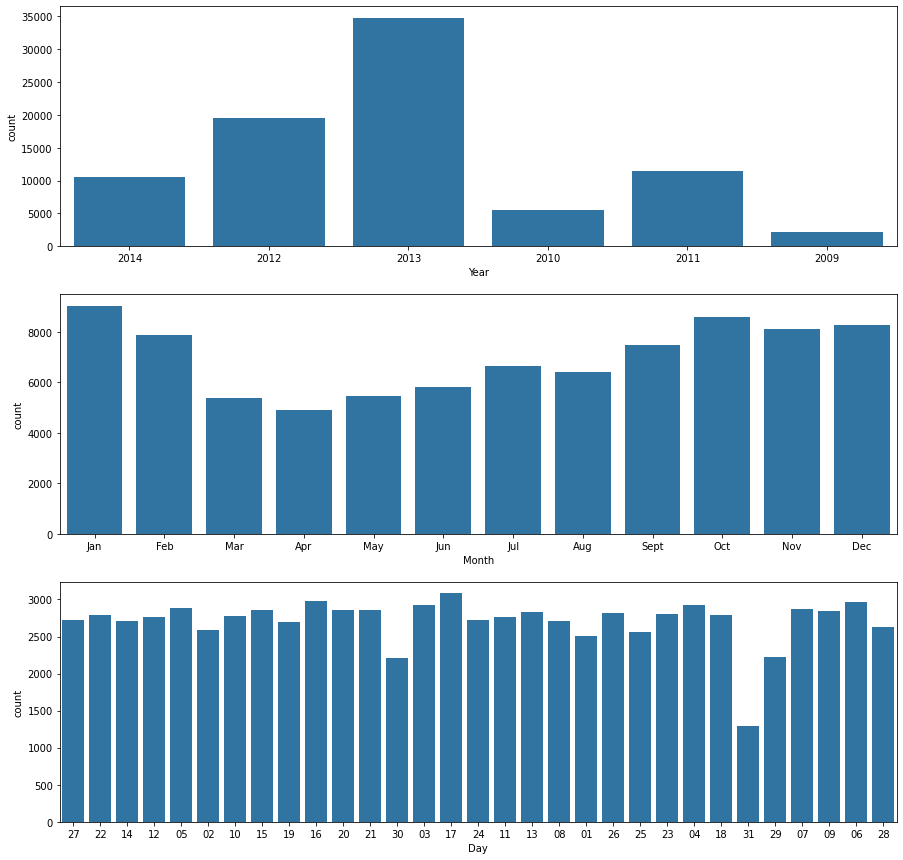

In [33]:
#Countplots of loans listed by year,month and day
fig, ax = plt.subplots(nrows=3,figsize=[15,15])
default_color=sb.color_palette()[0]
sb.countplot(data=df_proloans,x='Year',color=default_color,ax=ax[0])
sb.countplot(data=df_proloans,x='Month',color=default_color,ax=ax[1])
sb.countplot(data=df_proloans,x='Day',color=default_color,ax=ax[2])


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The main variable of interest is Borrower APR


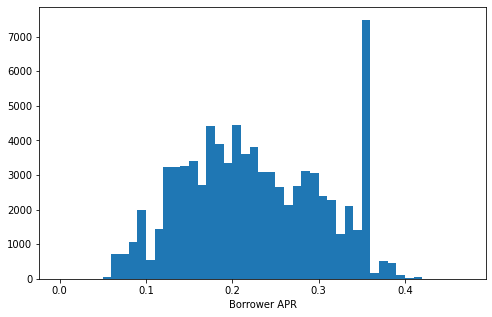

In [35]:
bins= np.arange(0,df_proloans.BorrowerAPR.max()+0.05,0.01)
plt.figure(figsize=[8,5])
plt.hist(data=df_proloans,x='BorrowerAPR',bins=bins);
plt.xlabel('Borrower APR'); 

From the histogram few loans have APR greater than 0.43

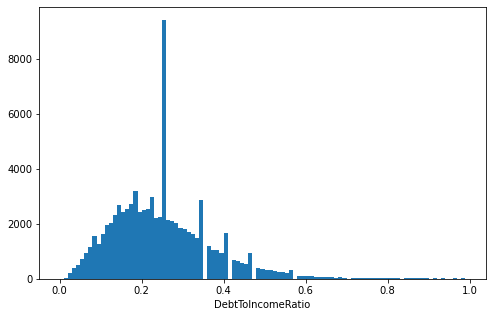

In [36]:
#DebtToIncomeRatio distribution
bins = np.arange(0,1,0.01)
plt.figure(figsize=[8,5])
plt.hist(data=df_proloans,x='DebtToIncomeRatio',bins=bins);
plt.xlabel('DebtToIncomeRatio'); 

Most clients of Prosper Bank prefer 1:4 ratio of debt to income evidenced by a peak at 0.25

Text(0.5, 0, 'Original loan amount ($)')

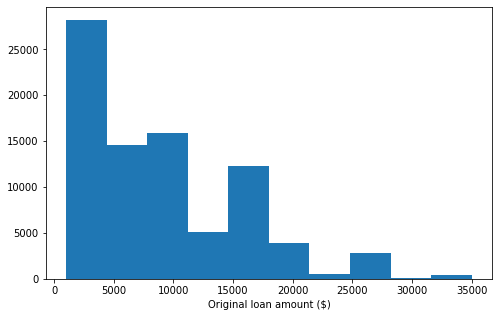

In [37]:
# Loan Original Amount distribution
plt.figure(figsize=[8,5])
plt.hist(df_proloans['LoanOriginalAmount']);
plt.xlabel('Original loan amount ($)')

The diagram shows spikes in 5k, 10k and 15k and shows most of the loans multiples of 5k

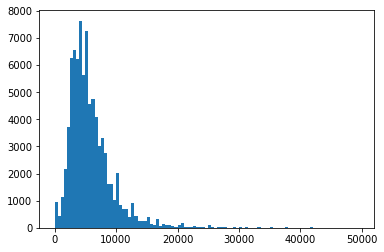

In [40]:
#Stated monthly income distribution
smi_bins = np.arange(0,50000,500)
plt.hist(data = df_proloans, x = 'StatedMonthlyIncome',bins=smi_bins);

According to the visualization the distribution of monthly income is skewed to the right, there are outliers around 50k and 100k which should be taken out.

In [41]:
df_proloans=df_proloans[df_proloans.StatedMonthlyIncome<30000]

Prosper Rating, Employment Status and Occupation distributions

In [42]:
# Prosper rating and employment status into ordered caategorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_proloans['ProsperRating (Alpha)'] = df_proloans['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
df_proloans['EmploymentStatus'] = df_proloans['EmploymentStatus'].astype(ordered_var)

C:\Users\USER\AppData\Local\Temp\ipykernel_11148\1060359678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proloans['ProsperRating (Alpha)'] = df_proloans['ProsperRating (Alpha)'].astype(ordered_var)
C:\Users\USER\AppData\Local\Temp\ipykernel_11148\1060359678.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proloans['EmploymentStatus'] = df_proloans['EmploymentStatus'].astype(ordered_var)


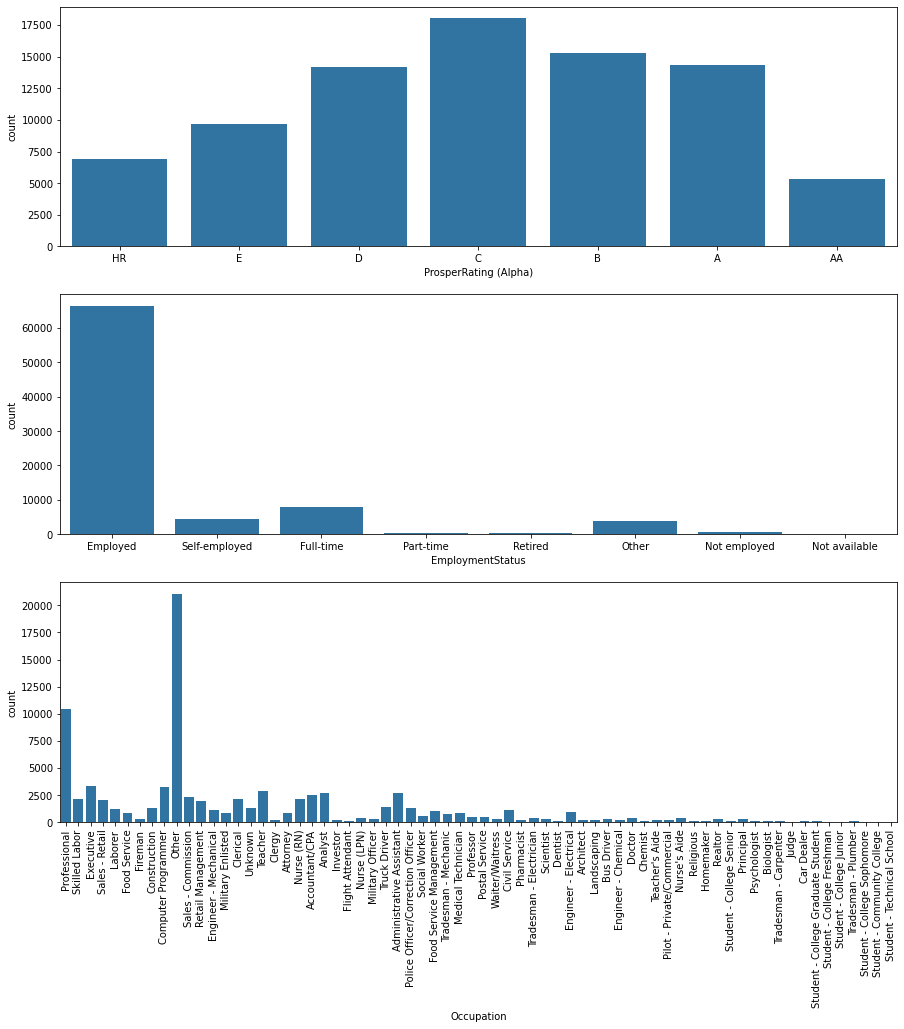

In [43]:
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sb.color_palette()[0]
sb.countplot(data = df_proloans, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0])
sb.countplot(data = df_proloans, x = 'EmploymentStatus', color = default_color, ax = ax[1]);
sb.countplot(data = df_proloans, x = 'Occupation', color = default_color, ax = ax[2]);
plt.xticks(rotation=90);

From the visualization most of the borrowers are individuals who are employed full time and the least are students.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The stated monthly income distribution is skewed to the right. DebtToIncomeRatio is also right skewed. There is no need to perform any transformations.

## Bivariate Exploration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

